In [1]:
import numpy as np
import pandas as pd

In [2]:
import os

In [3]:
base_data_dir = './data/alzheimer'
train_base_dir = f'{base_data_dir}/train'
test_base_dir = f'{base_data_dir}/test'

In [4]:
class_distributions = {}
classes = os.listdir(train_base_dir)

In [5]:
for class_name in classes:
    class_distributions[class_name] = len(os.listdir(f'{train_base_dir}/{class_name}'))

In [36]:
class_distributions

{'VeryMildDemented': 1792,
 'ModerateDemented': 52,
 'MildDemented': 717,
 'NonDemented': 2560}

In [6]:
from matplotlib import pyplot as plt

#### Distribution of classes in the train dataset

([0, 1, 2, 3],
 [Text(0, 0, 'VeryMildDemented'),
  Text(1, 0, 'ModerateDemented'),
  Text(2, 0, 'MildDemented'),
  Text(3, 0, 'NonDemented')])

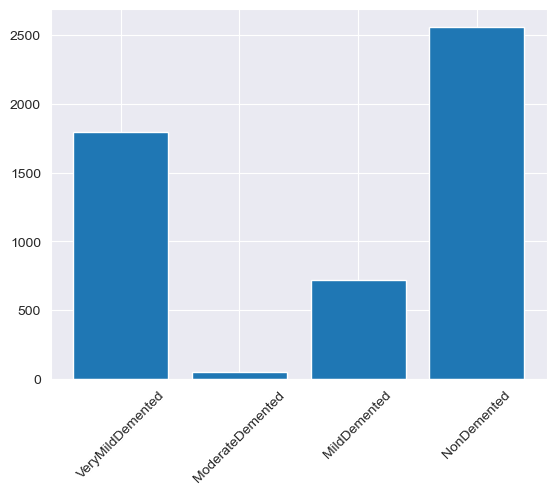

In [7]:
plt.bar(classes, class_distributions.values())
plt.xticks(rotation=45)

In [8]:
from PIL import Image

In [9]:
def get_image_dimensions(image_path):
    image = Image.open(image_path)
    return image.width, image.height

In [10]:
from tqdm import tqdm

In [11]:
class_dimensions_distributions = {
    'width': [],
    'height': [],
    'class': []
}

In [12]:
for class_name in classes:
    for image_name in tqdm(os.listdir(f'{train_base_dir}/{class_name}')):
        image_path = f'{train_base_dir}/{class_name}/{image_name}'
        image_width, image_height = get_image_dimensions(image_path)
        class_dimensions_distributions['width'].append(image_width)
        class_dimensions_distributions['height'].append(image_height)
        class_dimensions_distributions['class'].append(class_name)

100%|██████████| 2560/2560 [00:00<00:00, 6428.20it/s]


In [13]:
dimensions_df = pd.DataFrame(class_dimensions_distributions)

In [14]:
dimensions_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5121 entries, 0 to 5120
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   width   5121 non-null   int64 
 1   height  5121 non-null   int64 
 2   class   5121 non-null   object
dtypes: int64(2), object(1)
memory usage: 120.2+ KB


In [15]:
dimensions_df.describe()

,width,height
count,5121.0,5121.0
mean,176.0,208.0
std,0.0,0.0
min,176.0,208.0
25%,176.0,208.0
50%,176.0,208.0
75%,176.0,208.0
max,176.0,208.0


#### Distribution of photos' dimensions

In [16]:
dimensions_df['width'].value_counts(), dimensions_df['height'].value_counts()

(width
 176    5121
 Name: count, dtype: int64,
 height
 208    5121
 Name: count, dtype: int64)

In [17]:
dimensions_df.shape

(5121, 3)

In [18]:
def image_to_numpy(image_path):
    image = Image.open(image_path)
    return np.array(image)

In [19]:
# setting tensor to store all images' pixels
images = np.empty((5121, 208, 176))
class_to_idx = {}
for i in range(len(classes)):
    class_to_idx[classes[i]] = i
images_labels = np.empty(5121)

In [20]:
image_idx = 0
for class_name in classes:
    for image_name in tqdm(os.listdir(f'{train_base_dir}/{class_name}')):
        image_path = f'{train_base_dir}/{class_name}/{image_name}'
        images[image_idx] = image_to_numpy(image_path)
        images_labels[image_idx] = class_to_idx[class_name]
        image_idx += 1

100%|██████████| 2560/2560 [00:00<00:00, 6751.55it/s]


In [21]:
import seaborn as sns

#### Displaying heatmap for each class - whiter is weaker density

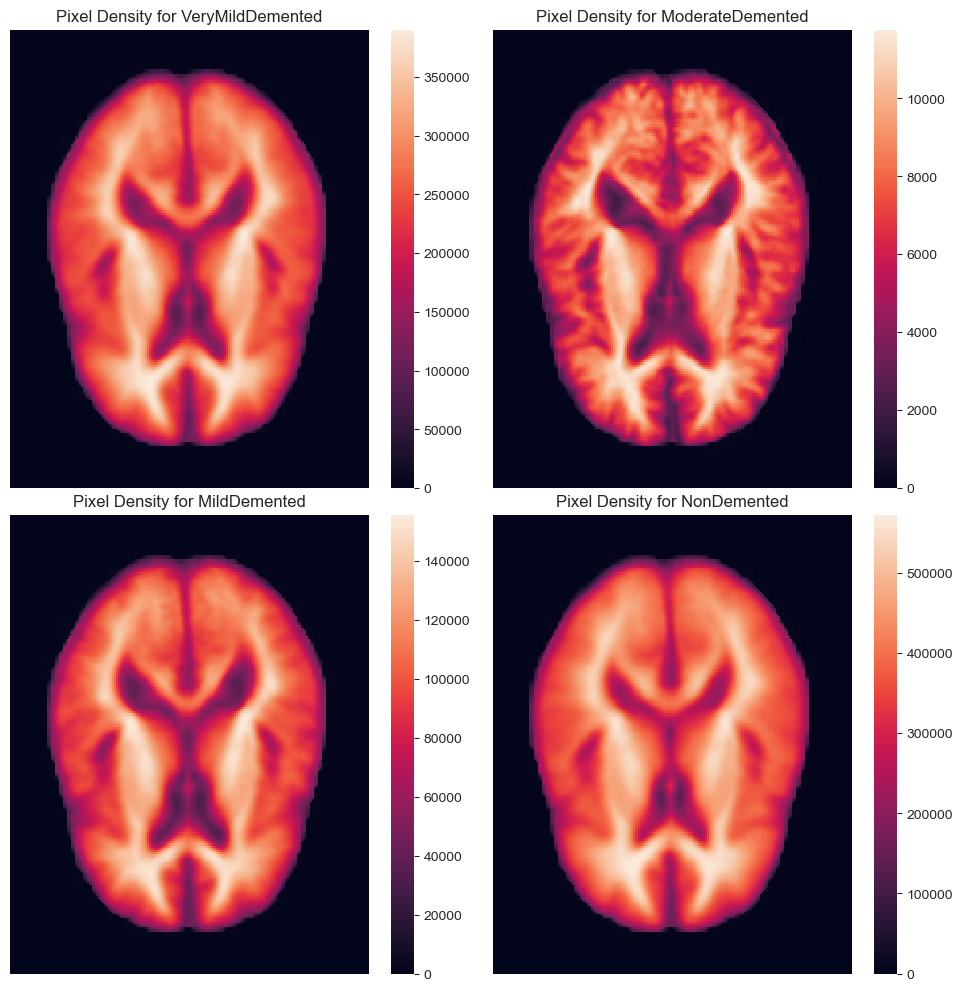

In [22]:
fig, axes = plt.subplots(2, 2, figsize=(10, 10), sharey=True, sharex=True)
fig.tight_layout()

for i in range(len(classes)):
    ax = axes[i//2, i%2]
    class_images = images[np.where(images_labels == i)]
    heatmap = np.sum(class_images, axis=0)
    sns.heatmap(heatmap, ax=ax)
    ax.set_title(f'Pixel Density for {classes[i]}')
    ax.get_yaxis().set_visible(False)
    ax.get_xaxis().set_visible(False)

#### Mean image per class

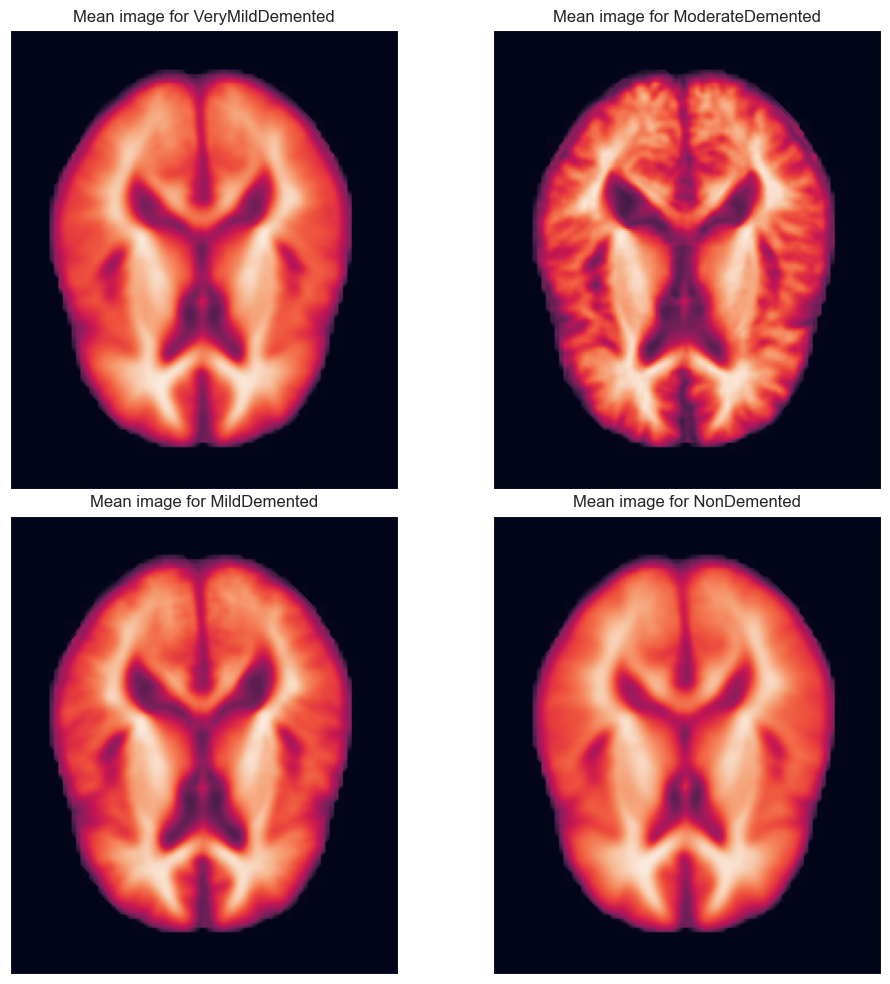

In [23]:
fig, axes = plt.subplots(2, 2, figsize=(10, 10), sharey=True, sharex=True)
fig.tight_layout()

for i in range(len(classes)):
    ax = axes[i//2, i%2]
    class_images = images[np.where(images_labels == i)]
    mean_img = np.mean(class_images, axis=0)
    ax.imshow(mean_img)
    ax.set_title(f'Mean image for {classes[i]}')
    ax.get_yaxis().set_visible(False)
    ax.get_xaxis().set_visible(False)

#### Drop all empty pixels to reduce dimensions

In [24]:
# get leftmost non empty pixel
non_empty_pixels = np.where(images > 0)[1:]

In [25]:
non_empty_pixels

(array([ 16,  16,  16, ..., 191, 191, 191]),
 array([ 56,  59,  61, ..., 117, 118, 119]))

In [26]:
uppermost_pixel = np.min(non_empty_pixels[0])
bottommost_pixel = np.max(non_empty_pixels[0])
leftmost_pixel = np.min(non_empty_pixels[1])
rightmost_pixel = np.max(non_empty_pixels[1])

In [27]:
# top left
leftmost_pixel, uppermost_pixel

(16, 16)

In [28]:
# bottom right
rightmost_pixel, bottommost_pixel

(159, 191)

In [29]:
images = images[:, uppermost_pixel:bottommost_pixel+1, leftmost_pixel:rightmost_pixel+1]

In [30]:
images.shape

(5121, 176, 144)

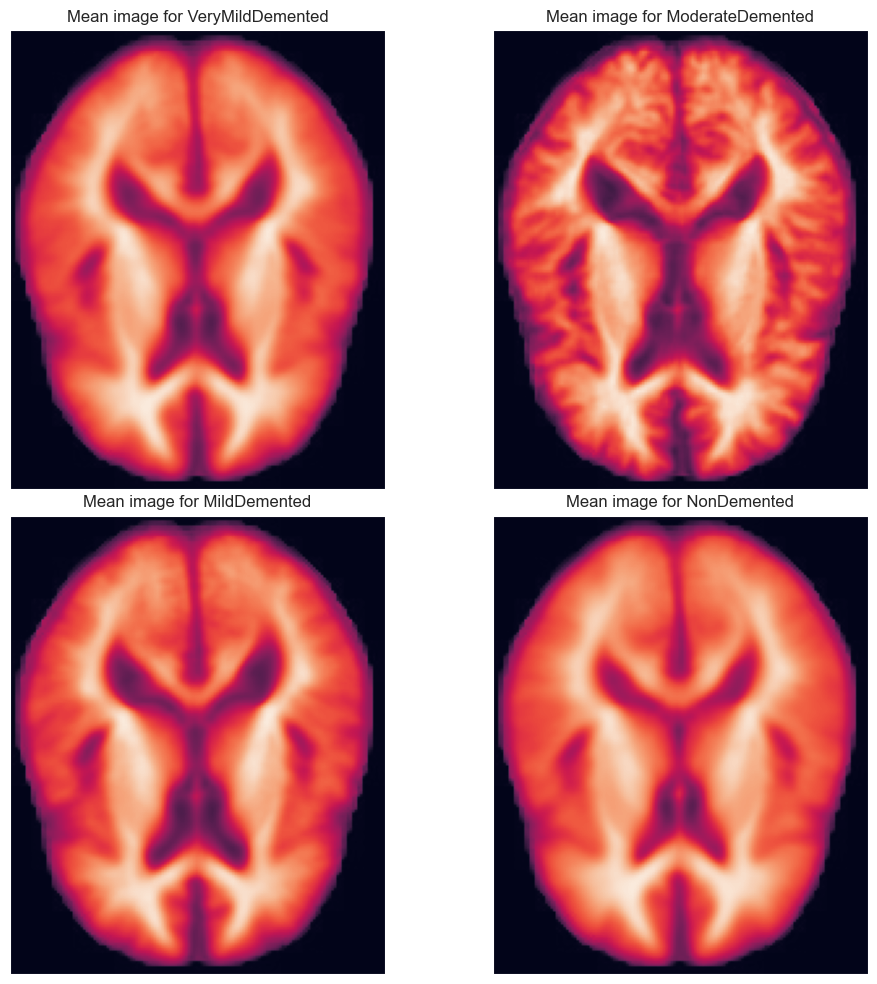

In [31]:
fig, axes = plt.subplots(2, 2, figsize=(10, 10), sharey=True, sharex=True)
fig.tight_layout()

for i in range(len(classes)):
    ax = axes[i//2, i%2]
    class_images = images[np.where(images_labels == i)]
    mean_img = np.mean(class_images, axis=0)
    ax.imshow(mean_img)
    ax.set_title(f'Mean image for {classes[i]}')
    ax.get_yaxis().set_visible(False)
    ax.get_xaxis().set_visible(False)

In [32]:
df = pd.DataFrame(images.reshape(images.shape[0], -1), columns=[f'pixel{i}' for i in range(176*144)])

In [33]:
df.shape

(5121, 25344)

In [35]:
# number of reduced dimensions
208 * 176 - 25344

11264